In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
from tensorflow import keras


In [ ]:
train_X=pd.read_csv('drive/My Drive/csvTrainImages.csv')
test_X=pd.read_csv('drive/My Drive/csvTestImages.csv')
train_y=pd.read_csv('drive/My Drive/csvTrainLabel.csv')
test_y=pd.read_csv('drive/My Drive/csvTestLabel .csv')

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(59999, 784)
(9999, 784)
(59999, 1)
(9999, 1)


In [ ]:
train_X=train_X.iloc[:,:].values
test_X=test_X.iloc[:,:].values


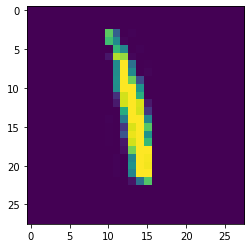

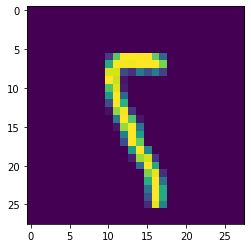

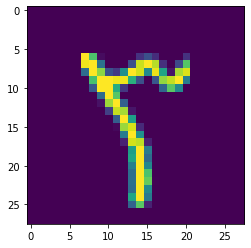

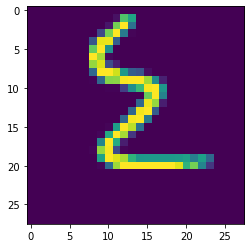

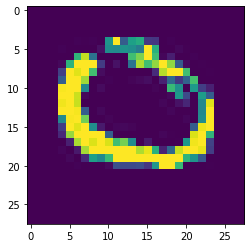

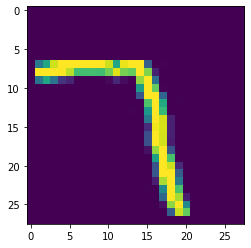

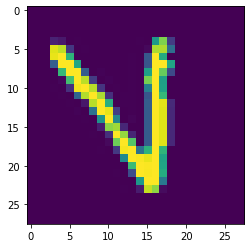

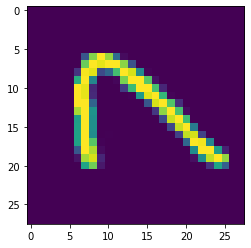

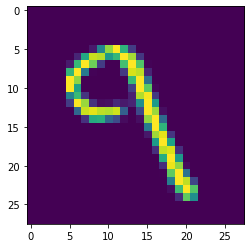

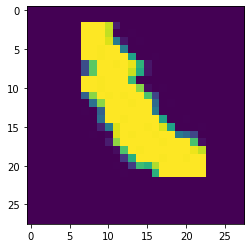

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.imshow(train_X[i].reshape(28,28).T)
  plt.show()

In [ ]:
train_y=train_y.iloc[:,0].values
train_y

array([1, 2, 3, ..., 7, 8, 9])

In [ ]:
test_y=test_y.iloc[:,0].values
test_y

array([1, 2, 3, ..., 7, 8, 9])

In [ ]:
train_y=keras.utils.to_categorical(train_y)
test_y=keras.utils.to_categorical(test_y)

In [ ]:
train_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
train_X=train_X/255.0
test_X=test_X/255.0

In [ ]:
train_X=train_X.reshape(train_X.shape[0],28,28,1)
test_X=test_X.reshape(test_X.shape[0],28,28,1)

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_X,train_y,batch_size=128,epochs=5,validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 54s 103ms/step - loss: 0.4449 - accuracy: 0.8960 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 2/5
375/375 [==============================] - 38s 102ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0352 - val_accuracy: 0.9891
Epoch 3/5
375/375 [==============================] - 38s 101ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0370 - val_accuracy: 0.9907
Epoch 4/5
375/375 [==============================] - 38s 101ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0394 - val_accuracy: 0.9888
Epoch 5/5
375/375 [==============================] - 38s 100ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0292 - val_accuracy: 0.9914
